In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from dataclasses import dataclass
from typing import Type

# Figure 3.11

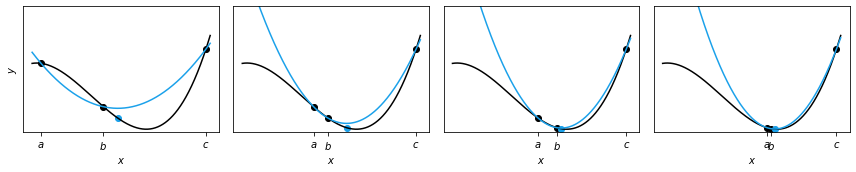

In [184]:
f = lambda x: x - 2*x**2 + 0.2*x**3

def get_q(x, a, b, c):
    fa = f(a)
    fb = f(b)
    fc = f(c)
    return fa*(x-b)*(x-c)/((a-b)*(a-c)) +\
            fb*(x-a)*(x-c)/((b-a)*(b-c)) +\
            fc*(x-a)*(x-b)/((c-a)*(c-b))

def get_axis(ya, yb, yc, a, b, c, ax):

    x = 0.5*(ya*(b**2-c**2)+yb*(c**2-a**2)+yc*(a**2-b**2)) / (ya*(b-c) +yb*(c-a) +yc*(a-b))
    yx = f(x)

    xs = np.arange(0,10,0.01)
    ax.plot(xs, f(xs), c='k')
    ax.scatter([a,b,c],[f(v) for v in [a, b, c]], c='k')
    ax.set_yticks([])
    ax.set_xticks([a,b,c])
    ax.set_xticklabels([f"$a$", f"$b$", f"$c$"])
    ax.scatter([x], [f(x)],c='#1ba1ea')
    ax.plot(xs, [get_q(x, a,b,c) for x in xs], c='#1ba1ea')
    ax.set_ylim(-24,20)
    ax.set_xlabel(f"$x$")

a = 0.5
b = 4.0
c = 9.75

ya, yb, yc = f(a), f(b), f(c)

fig, ax = plt.subplots(1,4, figsize=(12,2.5))
for N in range(4):
    get_axis(ya, yb, yc, a, b, c, ax[N])
    if N == 0:
        ax[N].set_ylabel(f"$y$")
    x = 0.5*(ya*(b**2-c**2)+yb*(c**2-a**2)+yc*(a**2-b**2)) / (ya*(b-c) +yb*(c-a) +yc*(a-b))
    yx = f(x)

    a, b, c, ya, yb, yc = (b, x, c, yb, f(x), yc) if x > b else (a, x, b, ya, f(x), yb)

    if x > b:
        if yx > yb:
            c, yc = x, yx
        else:
            a, ya, b, yb = b, yb, x, yx
    
    elif x < b:
        if yx > yb:
            a, ya = x, yx
        else:
            c, yc, b, yv = b, yb, x, yx

fig.tight_layout()

# Figure 3.14

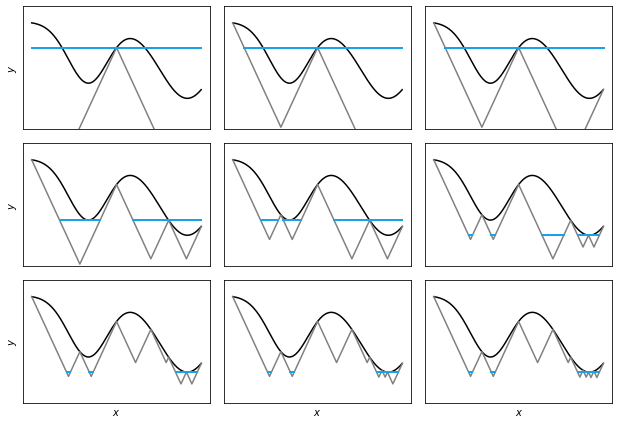

In [120]:
f = lambda x: 1.75 - (np.exp(-((x-2.5)**2)) + 1.25*np.exp(-0.5*(x-6.0)**2))

a = 0.5
b = 6.5

def _get_shubert_piyavskii_intersection(A, B, L):
    t = ((A[1] - B[1]) - L*(A[0] - B[0])) / (2*L)
    return A + np.array([t, -t*L])

fig, ax = plt.subplots(3,3,figsize=(8.7,6))

N = 9
xs = np.arange(0.5, 6.5,0.01)

for n in range(N):
    row = int(n/3)
    col = n-3*int(n/3)
    ax[row, col].plot(xs,f(xs),c='k')
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    ax[row, col].set_ylim(0,2)
    if col == 0:
        ax[row,col].set_ylabel(f"$y$")
    if row == 2:
        ax[row,col].set_xlabel(f"$x$")
    L = 1.0
    x1 = (a+b)/2.0
    P1 = np.array([x1,f(x1)])
    delta_1 = (b-a)/2.0
    pts = np.array([
        [a, P1[1]-L*delta_1],
        [x1,f(x1)],
        [b, P1[1]-L*delta_1]
    ])

    for k in range(1,n+1):
        # i = np.argmin([pts[j,1] for j in range(pts.shape[0])])
        i = np.argmin([P[1] for P in  pts])
        x = pts[i,0]
        P = np.array([x,f(x)])

        if i == 0:
            pts[0,:] = P
            pts = np.insert(pts, [1], _get_shubert_piyavskii_intersection(P, pts[1,:], L), axis=0)
        elif i == pts.shape[0]-1:
            pts[-1, :] = P
            pts = np.insert(pts, [pts.shape[0]-1], _get_shubert_piyavskii_intersection(pts[-2,:], P, L), axis=0)
        else:
            P_prev = _get_shubert_piyavskii_intersection(pts[i-1,:], P, L)
            P_next = _get_shubert_piyavskii_intersection(P, pts[i+1,:], L)
            pts = np.delete(pts,i,0)
            pts = np.insert(pts,[i],P_next,axis=0)
            pts = np.insert(pts,[i],P,axis=0)
            pts = np.insert(pts,[i],P_prev,axis=0)
    ax[row, col].plot([pts[j,0] for j in range(pts.shape[0])], [pts[j,1] for j in range(pts.shape[0])], color='grey')

    offset = 0 if pts[1,1] < pts[0,1] else 1

    i = offset + 2*(np.argmin([P[1] for P in pts[offset:-1:2,:]]))
    xmin = pts[i,0]
    ymin = pts[i,1]

    start = 1 if offset == 0 else 0
    for j in range(start, pts.shape[0], 2):
        if pts[j,1] < ymin:
            xj = pts[j,0]
            delta = ymin - pts[j,1]
            x_lo = np.max([a, xj-delta/L])
            x_hi = np.min([b, xj+delta/L])
            ax[row, col].plot([x_lo, x_hi], [ymin, ymin], color='#1ba1ea', linewidth='2')

fig.tight_layout()

# Figure 3.16

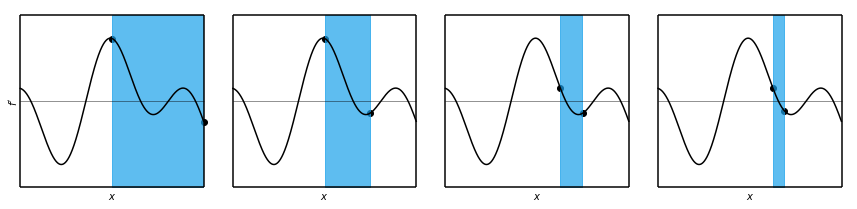

In [149]:
def plot_bisection(f, x, a, b, itera, ax):
    ax.plot(x,f(x), c='k')
    ax.set_axis_off()
    ax.text(2, -0.7, r"$x$",horizontalalignment='center', verticalalignment='bottom')
    if itera == 0:
        ax.text(-6.0, 0.0, r"$f'$",horizontalalignment='left', verticalalignment='center',rotation=90,)
    ax.hlines([0],[-5],[9],color='k',alpha=0.7, linewidth=0.6)
    ax.hlines([0.6,-0.6],[-5,-5],[9,9],color='k')
    ax.vlines([-5,9],[-0.6,-0.6],[0.6,0.6],color='k')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter([a,b], [f(a), f(b)],c='k')
    ax.fill_between(np.arange(a,b,0.05), -0.6, 0.6, alpha=0.7, color='#1ba1ea')

def bisection(f_deriv, a, b, N, ax):
    xs = np.arange(-5,9,0.01)
    if a > b:
        a, b = b, a
    
    ya, yb = f_deriv(a), f_deriv(b)

    if ya == 0:
        b = a
    if yb == 0:
        a = b
    n = 0
    while n < N:
        x = (a+b)/2
        y = f_deriv(x)
        if y == 0:
            a, b = x, x
        elif y*ya> 0:
            a = x
        else:
            b = x
        plot_bisection(f, xs, a,b, n, ax[n])
        n += 1
    
    return (a,b)
f = lambda x: (np.sin(x) + np.sin(x/2))/4
x = np.arange(-5, 9, 0.01)
a, b = -5, 9
N = 4
fig, ax = plt.subplots(1, N, figsize=(12,3))
sol = bisection(f, a, b, N, ax)
fig.tight_layout()
fig.savefig('3_16.png')